# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
df = pd.read_csv('/datasets/games.csv')

In [3]:
# Display basic information about the dataset
display(df)
display(df[df['Name']== 'Grand Theft Auto V'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M


In [4]:
# Check for duplicate entries
print(df.duplicated().sum())

0


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [5]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

In [6]:
# Verify the changes
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.2 Data Type Conversion

In [7]:
# Check current data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.

#'user_score' is a numeric values and should be convert to 'float' instead set as 'object'
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float) 

#Year is whole-number values so should be convert into 'int' instead of 'float'
#datatype set to 'int64' for flexibly when dealing with missing values
df['year_of_release'] = df['year_of_release'].astype('Int64') 

In [9]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

#TBD values are treated as missing, so I replaced them with NaN to allow numerical operations and future imputation

### 2.3 Handling Missing Values

In [10]:
# Examine missing values
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
# Calculate percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
print(round(percent_missing,2))

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         54.59
rating             40.48
dtype: float64


In [12]:
# Analyze patterns in missing values

# For 'percent_missing' < 5% -> use imputation to replace missing values 
# For 'percent_missing' > 30% -> using placeholder as NAN 

In [13]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy

#leave missing values as NaN for this analysis

In [14]:
# Why do you think the values are missing? Give possible reasons.
# Answer: avoid filling missing values to avoid distorting analysis patterns and maintain data credibility

<b> Student's comment:</b>
thank you for reviewing and give me helpful feedback :)


### 2.4 Calculate Total Sales

In [15]:
# Calculate total sales across all regions and put them in a different column
#displaying how much sale for each game
df['total_sale'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [16]:
# Create a DataFrame with game releases by year
game_by_year = df.groupby('year_of_release')

In [17]:
#Calculate Distribute of game each year
game_by_year = game_by_year.size()

game_by_year = game_by_year.reset_index()

game_by_year.columns = ['year_of_release', 'number_of_games']

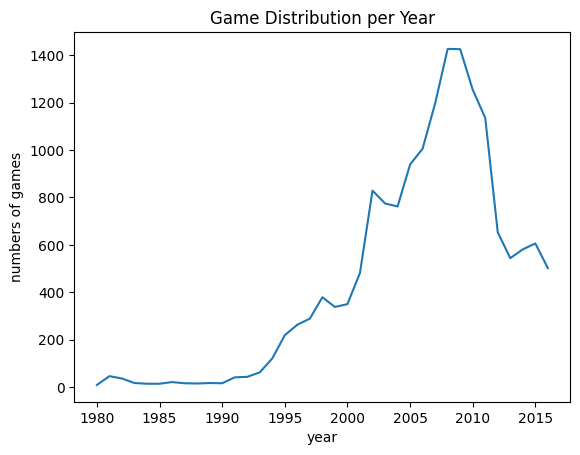

In [18]:
# Display summary statistics for each year
#display(game_per_year)
game_by_year.plot( x = 'year_of_release', y = 'number_of_games', 
                   title = 'Game Distribution per Year',
                   xlabel = 'year', ylabel = 'numbers of games', legend = False )
plt.show()


### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [19]:
# Calculate total sales by platform and year
sale_per_genre = df.groupby(['year_of_release', 'genre'])

sale_per_genre = sale_per_genre['total_sale'].sum()
display(sale_per_genre)

year_of_release  genre       
1980             Action           0.34
                 Fighting         0.77
                 Misc             2.70
                 Shooter          7.07
                 Sports           0.50
                                 ...  
2016             Role-Playing    18.18
                 Shooter         38.22
                 Simulation       1.89
                 Sports          23.49
                 Strategy         1.13
Name: total_sale, Length: 387, dtype: float64

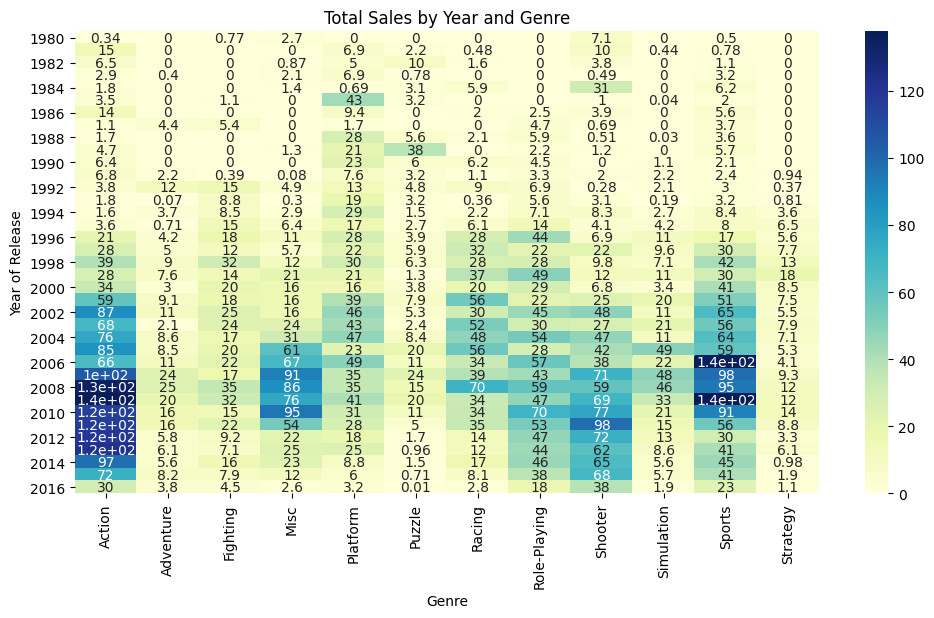

In [20]:
# Create a heatmap of platform sales over time
heatmap_data = sale_per_genre.unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Total Sales by Year and Genre')
plt.ylabel('Year of Release')
plt.xlabel('Genre')
plt.show()

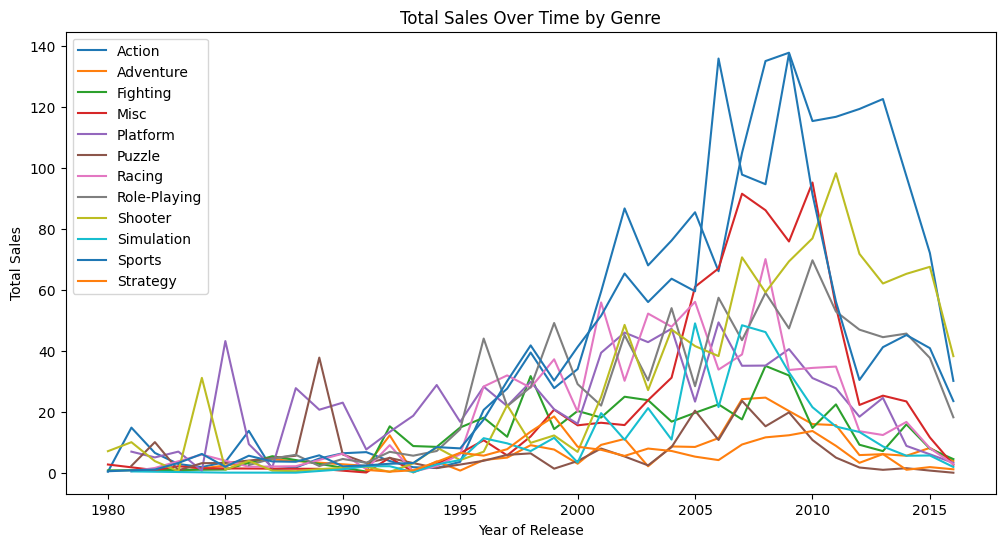

In [21]:
# Identify platforms with declining sales
sale_per_genre = sale_per_genre.reset_index()

plt.figure(figsize=(12,6))

for genre, group in sale_per_genre.groupby('genre'):
    # sort by year to keep lines smooth
    group = group.sort_values('year_of_release')
    plt.plot(group['year_of_release'], group['total_sale'], label=genre)

plt.title("Total Sales Over Time by Genre")
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [22]:
# Your code here to filter the dataset to relevant years
# Example:
relevant_years = [2013,2014,2015,2016] # Replace with your chosen years
df_relevant = df[df['year_of_release'].isin(relevant_years)]
# Justify your choice with data
#The 5 years timeframe captures recent market trends, platforms, and consumer behavior.
display(df_relevant)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [23]:
# Analyze platform sales trends
platform_sales = df_relevant.groupby('platform')['total_sale'].sum().reset_index()
display(platform_sales)

,platform,total_sale
0,3DS,143.25
1,DS,1.54
2,PC,39.43
3,PS3,181.43
4,PS4,314.14
5,PSP,3.50
6,PSV,32.99
7,Wii,13.66
8,WiiU,64.63
9,X360,136.80


In [24]:
# Sort platforms by total sales
platform_sales = platform_sales.sort_values('total_sale',ascending=False)
display(platform_sales)

,platform,total_sale
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


platform              3DS   DS        PC       PS3       PS4       PSP  \
year_of_release                                                          
2013                  NaN  NaN       NaN       NaN       NaN       NaN   
2014            -0.226445  0.0  0.072698 -0.578278  2.847634 -0.923567   
2015            -0.365174  0.0 -0.358434 -0.647822  0.189000 -0.500000   
2016            -0.455004  0.0 -0.383803 -0.785969 -0.417578  0.000000   

platform              PSV       Wii      WiiU      X360      XOne  
year_of_release                                                    
2013                  NaN       NaN       NaN       NaN       NaN  
2014             0.123702 -0.563446  0.017552 -0.607812  1.851793  
2015            -0.474790 -0.696000 -0.257830 -0.655728  0.112262  
2016            -0.320000 -0.842105 -0.718654 -0.872910 -0.565181  


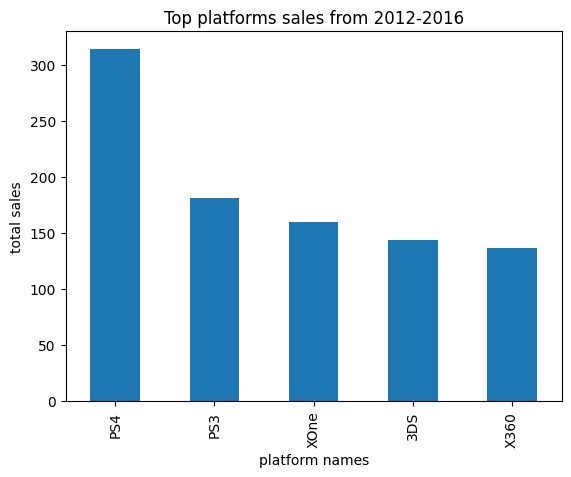

In [25]:
# Visualize top platforms
(platform_sales.head(5)).plot(x = 'platform', y = 'total_sale', 
                              kind ='bar', title = 'Top platforms sales from 2012-2016',
                             xlabel = 'platform names', ylabel = 'total sales', legend = False)

# Calculate year-over-year growth for each platform
sales_by_year_platform = df_relevant.groupby(['year_of_release', 'platform'])['total_sale'].sum().reset_index()
sales_pivot = sales_by_year_platform.pivot(index='year_of_release', columns='platform', values='total_sale')

# Your code here to calculate and visualize platform growth rates
growth = sales_pivot.pct_change()
print(growth)

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

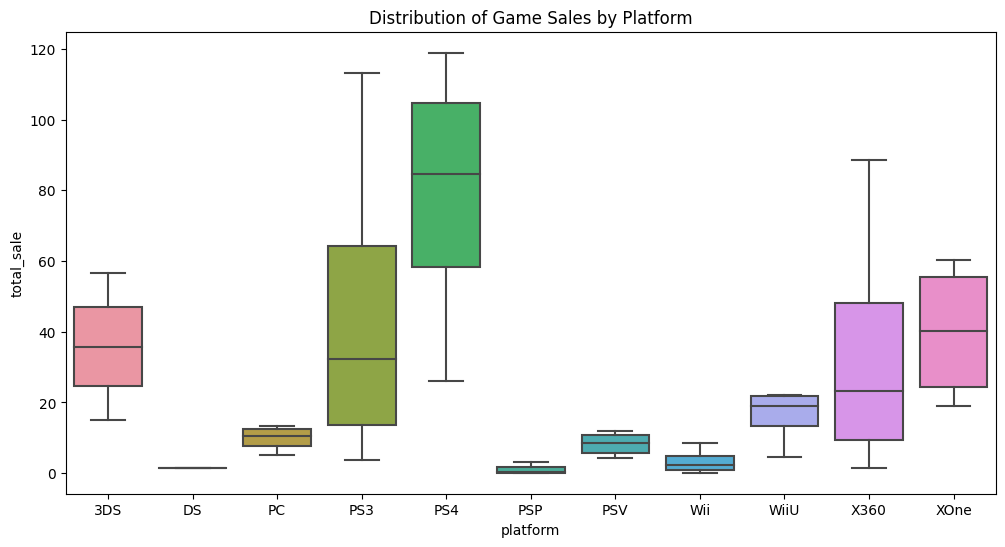

In [26]:
# Create box plot of sales by platform
plt.figure(figsize=(12,6))
sns.boxplot(x='platform', y='total_sale', data= sales_by_year_platform)
plt.title("Distribution of Game Sales by Platform")
plt.show()

In [27]:
# Calculate detailed statistics for each platform
stats_by_platform = sales_by_year_platform.groupby('platform')['total_sale'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std').reset_index()

print(stats_by_platform)

   platform  count       mean  median    min     max        std
0       3DS      4  35.812500  35.770  15.14   56.57  18.128338
1        DS      1   1.540000   1.540   1.54    1.54        NaN
2        PC      4   9.857500  10.450   5.25   13.28   3.701102
3       PS3      4  45.357500  32.290   3.60  113.25  48.898675
4       PS4      4  78.535000  84.625  25.99  118.90  40.567917
5       PSP      3   1.166667   0.240   0.12    3.14   1.710010
6       PSV      4   8.247500   8.420   4.25   11.90   3.596205
7       Wii      4   3.415000   2.445   0.18    8.59   3.765355
8      WiiU      4  16.157500  19.000   4.60   22.03   8.129507
9      X360      4  34.200000  23.350   1.52   88.58  38.816131
10     XOne      4  39.830000  40.110  18.96   60.14  20.313977


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [28]:
# Choose a popular platform based on your previous analysis
popular_platform = df[df['platform'].isin(['3DS','PS3','PS4','X360','XOne'])]
display(popular_platform)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [29]:
# Create scatter plots for both critic and user scores

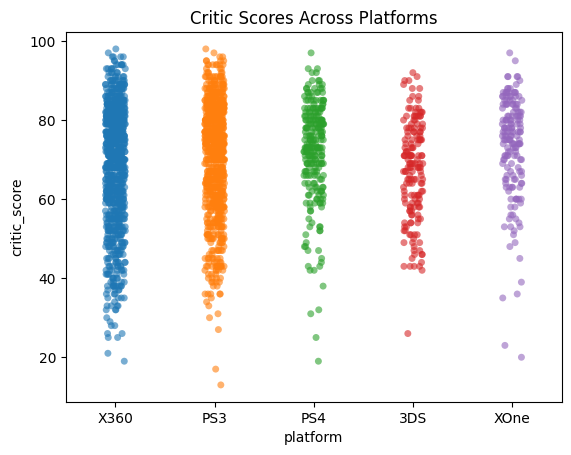

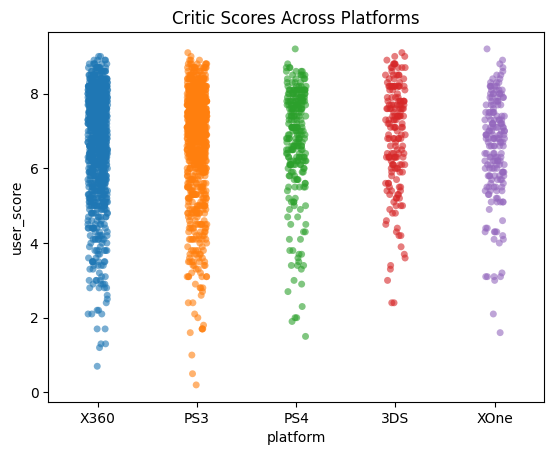

              critic_score  user_score
critic_score        1.0000      0.6024
user_score          0.6024      1.0000


In [30]:
# Critic Scores
sns.stripplot(x='platform', y='critic_score', data=popular_platform, jitter=True, alpha=0.6)
plt.title("Critic Scores Across Platforms")
plt.show()

# User Scores
sns.stripplot(x='platform', y='user_score', data=popular_platform, jitter=True, alpha=0.6)
plt.title("Critic Scores Across Platforms")
plt.show()

# Calculate correlations
print(popular_platform[['critic_score', 'user_score']].corr())

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [31]:
# Find games released on multiple platforms
dup_games = (df[df['name'].duplicated()]) 
display(dup_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:title={'center':'Grand Theft Auto V Total Sales Across Platforms'}, xlabel='platform', ylabel='total sales (in million)'>

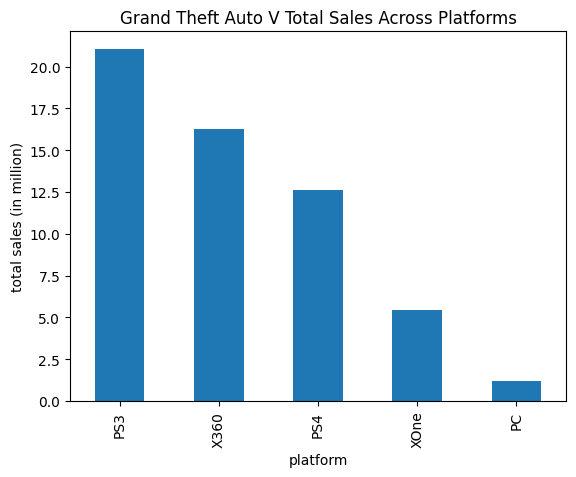

In [32]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance
(df[df['name'] == 'Grand Theft Auto V']).plot(x = 'platform', y = 'total_sale', 
                                              kind = 'bar', legend = False,
                                              ylabel = 'total sales (in million)', title = 'Grand Theft Auto V Total Sales Across Platforms')

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [33]:
# Analyze genre performance
sale_per_genre =  df.groupby('genre')['total_sale'].sum().reset_index()
display(sale_per_genre)

,genre,total_sale
0,Action,1744.17
1,Adventure,237.59
2,Fighting,447.53
3,Misc,802.51
4,Platform,827.77
5,Puzzle,242.57
6,Racing,728.67
7,Role-Playing,934.56
8,Shooter,1052.45
9,Simulation,389.97


In [34]:
# Sort genres by total sales
sale_per_genre = sale_per_genre.sort_values(by='total_sale', ascending=False)
display(sale_per_genre)

,genre,total_sale
0,Action,1744.17
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77
3,Misc,802.51
6,Racing,728.67
2,Fighting,447.53
9,Simulation,389.97
5,Puzzle,242.57


<AxesSubplot:title={'center':'Total Sales across Game Genres'}, xlabel='genre', ylabel='total sales (in million)'>

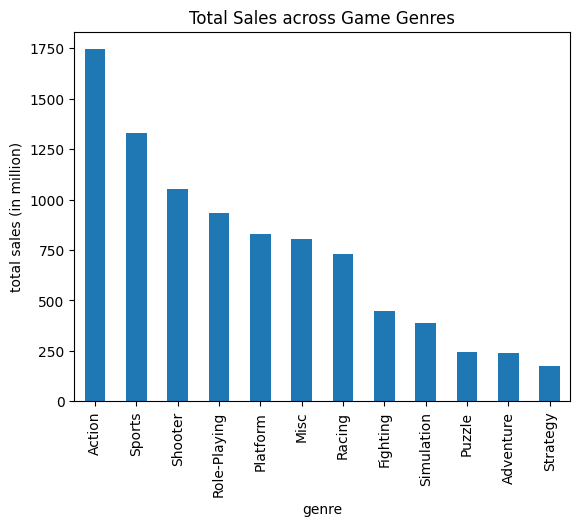

In [35]:
# Visualize genre distribution
sale_per_genre.plot(x = 'genre', y = 'total_sale',kind = 'bar', ylabel = 'total sales (in million)', 
                    title = 'Total Sales across Game Genres', legend = False)

In [36]:
# Calculate market share for each genre
market_share = df.groupby('genre')['total_sale'].sum()
market_share = (market_share / market_share.sum()) * 100
display(market_share)

genre
Action          19.568195
Adventure        2.665570
Fighting         5.020929
Misc             9.003522
Platform         9.286919
Puzzle           2.721442
Racing           8.175096
Role-Playing    10.485017
Shooter         11.807649
Simulation       4.375152
Sports          14.935787
Strategy         1.954722
Name: total_sale, dtype: float64

### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [37]:
# Function to analyze platform performance by region
def analyze_platform_performance(data):
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    platform_performance = df.groupby('platform')[regions].sum()
    return platform_performance

In [38]:
# Analyze each region
platform_performance = analyze_platform_performance(df)
display(platform_performance)

,na_sales,eu_sales,jp_sales
platform,,,
2600,90.60,5.47,0.00
3DO,0.00,0.00,0.10
3DS,83.49,61.48,100.67
DC,5.43,1.69,8.56
DS,382.40,188.89,175.57
GB,114.32,47.82,85.12
GBA,187.54,75.25,47.33
GC,133.46,38.71,21.58
GEN,21.05,6.05,2.70


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [39]:
# Create a comparative platform analysis
def get_top_platforms_by_region(data, region, top_n=5):
    return df.sort_values(by=region, ascending=False).head(top_n)

# Example for North America
top_platforms = get_top_platforms_by_region(platform_performance, 'na_sales')
display(top_platforms)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


<AxesSubplot:xlabel='platform'>

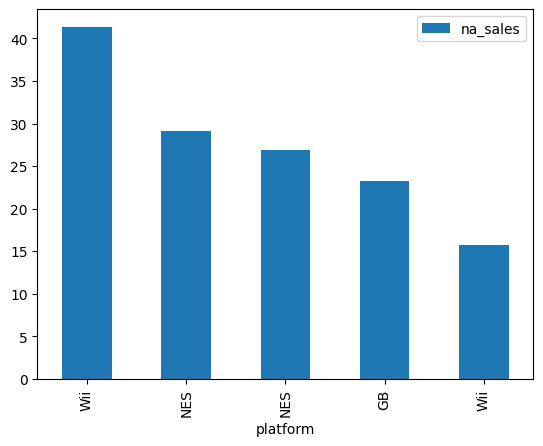

In [40]:
# Visualize cross-regional comparison for top platforms
top_platforms.plot(x = 'platform', y = 'na_sales', kind = 'bar')

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [41]:
# Function to analyze genre performance by region
def analyze_genre_performance(data):
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    genre_performance = data.groupby('genre')[regions].sum()
    return genre_performance
genre_performance = analyze_genre_performance(df)
display(genre_performance)

,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Adventure,105.26,63.54,52.30
Fighting,223.36,100.33,87.48
Misc,407.27,212.74,108.11
Platform,445.50,200.35,130.83
Puzzle,122.87,50.01,57.31
Racing,359.35,236.51,56.71
Role-Playing,330.81,188.71,355.41
Shooter,592.24,317.34,38.76


### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

,na_sales,eu_sales,jp_sales
genre,,,
Action,0.199749,0.214150,0.124432
Adventure,0.023920,0.026211,0.040313
Fighting,0.050757,0.041388,0.067430
Misc,0.092549,0.087759,0.083332
Platform,0.101237,0.082648,0.100845
Puzzle,0.027921,0.020630,0.044175
Racing,0.081660,0.097564,0.043713
Role-Playing,0.075174,0.077846,0.273953
Shooter,0.134583,0.130908,0.029877


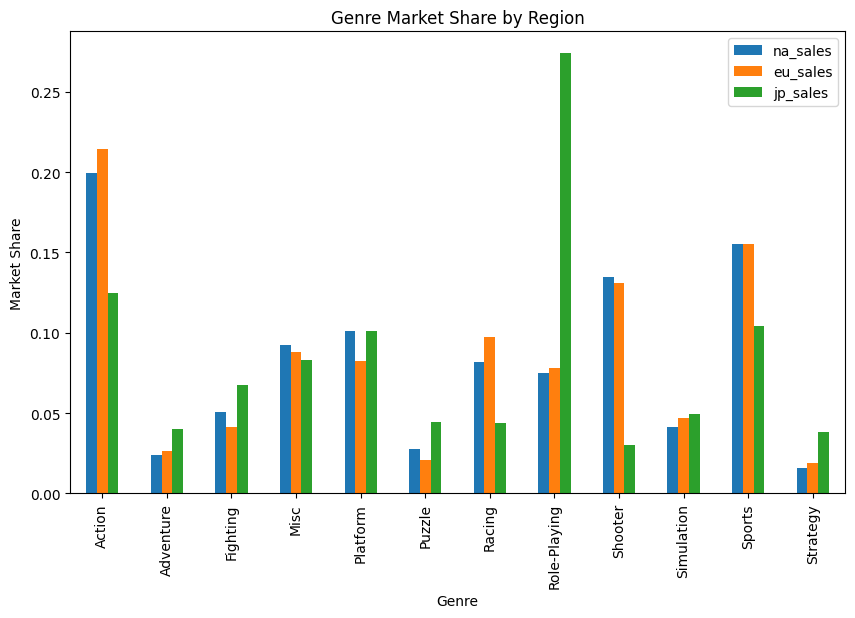

In [42]:
# Create a comparative genre analysis
genre_market_share = genre_performance.div(genre_performance.sum())
display(genre_market_share)

genre_market_share.plot(kind='bar', figsize=(10,6))
plt.title('Genre Market Share by Region')
plt.ylabel('Market Share')
plt.xlabel('Genre')
plt.show()

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [43]:
# Function to analyze ESRB rating impact
def analyze_esrb_impact(data):
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    esrb_performance = data.groupby('rating')[regions].sum()
    return esrb_performance
    
esrb_performance = analyze_esrb_impact(df)
display(esrb_performance)


,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1292.99,710.25,198.11
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,748.48,483.97,64.24
RP,0.00,0.08,0.00
T,759.75,427.03,151.40


In [44]:
# Analyze ESRB impact for each region
esrb_market_share = esrb_performance.div(esrb_performance.sum())
display(esrb_market_share)

,na_sales,eu_sales,jp_sales
rating,,,
AO,0.000399,0.000337,0.000000
E,0.409188,0.392221,0.435015
E10+,0.111814,0.104106,0.088272
EC,0.000484,0.000061,0.000000
K-A,0.000810,0.000149,0.003206
M,0.236869,0.267263,0.141060
RP,0.000000,0.000044,0.000000
T,0.240436,0.235819,0.332448


# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [45]:
# Filter the data
xbox_ratings = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df[df['platform'] == 'PC']['user_score'].dropna()

action_ratings = df[df['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df[df['genre'] == 'Sports']['user_score'].dropna()

# Perform t-tests
alpha = 0.05

t_stat1, p_val1 = ttest_ind(xbox_ratings, pc_ratings, equal_var=False)
t_stat2, p_val2 = ttest_ind(action_ratings, sports_ratings, equal_var=False)

print("Xbox vs PC p-value:", p_val1)
print("Action vs Sports p-value:", p_val2)

# Interpret results
if p_val1 < alpha:
    print("Reject H0: Significant difference in average user ratings between Xbox One and PC.")
else:
    print("Fail to reject H0: No significant difference between Xbox One and PC.")

if p_val2 < alpha:
    print("Reject H0: Significant difference in average user ratings between Action and Sports genres.")
else:
    print("Fail to reject H0: No significant difference between Action and Sports genres.")


Xbox vs PC p-value: 4.935072360183574e-06
Action vs Sports p-value: 0.11483818791498286
Reject H0: Significant difference in average user ratings between Xbox One and PC.
Fail to reject H0: No significant difference between Action and Sports genres.


# Step 6. Write a general conclusion


From this analysis, I see that Action and Sports games dominate global sales, while Japan strongly prefers Role-Playing games.
Platforms like PlayStation and Xbox drive the largest sales, with big variability in performance across titles.

Sales peaked around 2008–2010 and have declined since, showing clear market cycles. Regionally, preferences differ: NA and EU lean toward Action and Shooter games, Japan toward Role-Playing.

Hypothesis tests showed no major difference in user ratings between Xbox One and PC, but there is a difference between Action and Sports genres, suggesting genre impacts user satisfaction more than platform.
